<a href="https://colab.research.google.com/github/Hutaf/SDA-Machine-Learning/blob/main/Seattle_weather_RandomForest_ML13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment ML13**
Build a classification model of the Seattle Weather dataset with multiple features using scikit-learn's random forest classifier. 

Make sure you separate training and test sets and evaluate the models performance separately on these subsets. 

Use the same feature set you developed for the logistic regression assignment. How did the two perform against each other?


## Define heuristic model




In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
filepath = 'https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv'
df = pd.read_csv(filepath)

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold 100 values
heuristic_df = pd.DataFrame({'yesterday':[0.0]*numrows,
                             'today':[0.0]*numrows,
                             'tomorrow':[True]*numrows})

#sort columns for convience
seq = ['yesterday',
       'today',
       'tomorrow']
       
heuristic_df = heuristic_df.reindex(columns=seq)

In [3]:
print('-'*50)
print(df.info())
print('-'*50)
print(df.describe())
print('-'*50)
print(df.head())
print('\n')
print('-'*100)
print(heuristic_df.info())
print('-'*50)
print(heuristic_df.describe())
print('-'*50)
print(heuristic_df.head())

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB
None
--------------------------------------------------
               PRCP          TMAX          TMIN
count  25548.000000  25551.000000  25551.000000
mean       0.106222     59.544206     44.514226
std        0.239031     12.772984      8.892836
min        0.000000      4.000000      0.000000
25%        0.000000     50.000000     38.000000
50%        0.000000     58.000000     45.000000
75%        0.100000     69.000000     52.000000
max        5.020000    103.000000     71.000000
------------------------------

In [4]:
# build a heuristic data
for z in range(numrows):
    #start at time 2 in the data frame
    i = z + 2
    #pull values from the dataframe
    yesterday = df.iloc[(i-2),1]
    today = df.iloc[(i-1),1]
    tomorrow = df.iloc[i,1] 
    heuristic_df.iat[z,0] = yesterday
    heuristic_df.iat[z,1] = today
    heuristic_df.iat[z,2] = tomorrow

### Preparing the Seattle weather data

In [5]:
heuristic_df.isna().sum()

yesterday    3
today        3
tomorrow     0
dtype: int64

In [6]:
def isNull(df, column):
  return df[pd.isnull(df[column])]

In [7]:
isNull(heuristic_df, 'today')

,yesterday,today,tomorrow
18414,0.0,NaN,True
18415,NaN,NaN,False
21066,0.0,NaN,False


In [8]:
isNull(heuristic_df, 'yesterday')

,yesterday,today,tomorrow
18415,NaN,NaN,False
18416,NaN,0.0,False
21067,NaN,0.0,False


In [9]:
heuristic_df = heuristic_df.dropna()

In [10]:
heuristic_df.isna().sum()

yesterday    0
today        0
tomorrow     0
dtype: int64

# Regression

---
### 1. Break the dataset into two parts, training and testing.


In [12]:
X = heuristic_df.loc[:, ['yesterday', 'today']].values
y = heuristic_df['tomorrow'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### Scaling

#### **StandardScaler**

In [13]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **MinMaxScaler**

In [14]:
MinMax=MinMaxScaler()
X_train_ms = MinMax.fit_transform(X_train)
X_test_ms = MinMax.transform(X_test)

---
### 2. Use the first 80% of the dataset for training and the last 20% for testing.

In [15]:
reg= LogisticRegression(random_state=42,max_iter=200)
reg.fit(X_train,y_train)
print("Training score: {}".format(reg.score(X_train,y_train)))

Training score: 0.6741375091754344


In [16]:
reg= LogisticRegression(random_state=42,max_iter=200)
reg.fit(X_train_scaled,y_train)
print("Training score with (StandardScaler): {}".format(reg.score(X_train_scaled,y_train)))

Training score with (StandardScaler): 0.6742843161242965


In [17]:
reg= LogisticRegression(random_state=42,max_iter=200)
reg.fit(X_train_ms,y_train)
print("Training score with (MinMaxScaler): {}".format(reg.score(X_train_ms,y_train)))

Training score with (MinMaxScaler): 0.6683141668705652


---
### 3. Evaluate both sets of data using your function.

In [18]:
import numpy as np
def SSE(y_test, y_pred):
  difference = y_test - y_pred
  squared_errors = difference ** 2
  return np.sum(squared_errors)

In [19]:
def evaluation(model, X_test, y_test):
  print("Accuracy: {}%".format(round(accuracy_score(y_test, model.predict(X_test))*100)))
  print("Precision: {}%".format(round(precision_score(y_test, model.predict(X_test))*100)))
  print("Recall: {}%".format(round(recall_score(y_test, model.predict(X_test))*100)))
  print("MSE: {}".format(mean_squared_error(y_test, model.predict(X_test))))
  sse = SSE(y_pred=model.predict(X_test), y_test=y_test.astype('int'))
  print("SSE: {}".format(sse))

In [22]:
# data
print('*'*30)
print("Training Performance")
print('*'*30)
evaluation(reg, X_train, y_train)
print('*'*15)
print('Scaled')
print('*'*15)
print('--- Standard ---')
evaluation(reg, X_train_scaled, y_train)
print('*'*30)
print('--- MinMax ---')
evaluation(reg, X_train_ms, y_train)
print('*'*30)
print('\n')

print('*'*30)
print("Testing Performance")
print('*'*30)
evaluation(reg, X_test, y_test)
print('*'*15)
print('Scaled')
print('*'*15)
print('--- Standard ---')
evaluation(reg, X_test_scaled, y_test)
print('*'*30)
print('--- MinMax ---')
evaluation(reg, X_test_ms, y_test)
print('*'*30)
print('\n')

******************************
Training Performance
******************************
Accuracy: 70.0%
Precision: 65.0%
Recall: 63.0%
MSE: 0.30242231465622704
SSE: 6180
***************
Scaled
***************
--- Standard ---
Accuracy: 68.0%
Precision: 70.0%
Recall: 44.0%
MSE: 0.31504771225838024
SSE: 6438
******************************
--- MinMax ---
Accuracy: 67.0%
Precision: 74.0%
Recall: 34.0%
MSE: 0.3316858331294348
SSE: 6778
******************************


******************************
Testing Performance
******************************
Accuracy: 71.0%
Precision: 67.0%
Recall: 64.0%
MSE: 0.2930123311802701
SSE: 1497
***************
Scaled
***************
--- Standard ---
Accuracy: 69.0%
Precision: 75.0%
Recall: 45.0%
MSE: 0.3080837737326287
SSE: 1574
******************************
--- MinMax ---
Accuracy: 67.0%
Precision: 77.0%
Recall: 34.0%
MSE: 0.3317674691720493
SSE: 1695
******************************




### Extra: Confusion Matrix

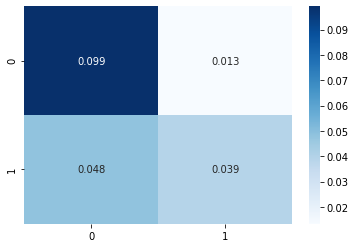

In [23]:
sns.heatmap(confusion_matrix(y_test, reg.predict(X_test_scaled)) / len(y), cmap='Blues', annot=True)

# Classification

---
### 1. Break the dataset into two parts, training and testing.


---
### 2. Use the first 80% of the dataset for training and the last 20% for testing.

In [24]:
rf=RandomForestClassifier(n_estimators= 10)
rf.fit(X_train,y_train)
print("Training score: {}".format(rf.score(X_train, y_train)))

Training score: 0.7544898458527037


In [25]:
# Scaled data
rf=RandomForestClassifier(n_estimators= 10)
rf.fit(X_train_scaled,y_train)
print("Training score with (StandardScaler): {}".format(rf.score(X_train_scaled, y_train)))

Training score with (StandardScaler): 0.7546855884511867


In [26]:
rf=RandomForestClassifier(n_estimators= 10)
rf.fit(X_train_ms,y_train)
print("Training score with (MinMaxScaler): {}".format(rf.score(X_train_ms, y_train)))

Training score with (MinMaxScaler): 0.7536090041595302


---
### 3. Evaluate both sets of data using your function.

In [27]:
# data
print('*'*30)
print("Training Performance")
print('*'*30)
evaluation(rf, X_train, y_train)
print('*'*15)
print('Scaled')
print('*'*15)
print('--- Standard ---')
evaluation(rf, X_train_scaled, y_train)
print('*'*30)
print('--- MinMax ---')
evaluation(rf, X_train_ms, y_train)
print('*'*30)
print('\n')

print('*'*30)
print("Testing Performance")
print('*'*30)
evaluation(rf, X_test, y_test)
print('*'*15)
print('Scaled')
print('--- Standard ---')
evaluation(rf, X_test_scaled, y_test)
print('*'*30)
print('\n')
print('--- MinMax ---')
evaluation(rf, X_test_ms, y_test)
print('*'*30)
print('\n')

******************************
Training Performance
******************************
Accuracy: 69.0%
Precision: 64.0%
Recall: 62.0%
MSE: 0.3075116222167849
SSE: 6284
***************
Scaled
***************
--- Standard ---
Accuracy: 68.0%
Precision: 67.0%
Recall: 49.0%
MSE: 0.3183264007829704
SSE: 6505
******************************
--- MinMax ---
Accuracy: 75.0%
Precision: 76.0%
Recall: 61.0%
MSE: 0.24639099584046978
SSE: 5035
******************************


******************************
Testing Performance
******************************
Accuracy: 69.0%
Precision: 66.0%
Recall: 62.0%
MSE: 0.3076923076923077
SSE: 1572
***************
Scaled
--- Standard ---
Accuracy: 69.0%
Precision: 71.0%
Recall: 50.0%
MSE: 0.3090624388334312
SSE: 1579
******************************


--- MinMax ---
Accuracy: 69.0%
Precision: 68.0%
Recall: 53.0%
MSE: 0.3141514973576042
SSE: 1605
******************************




### Extra: Confusion Matrix

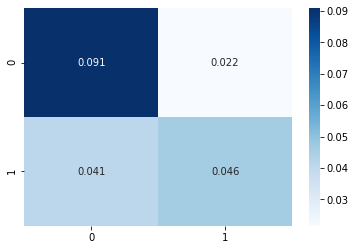

In [28]:
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test_ms)) / len(y), cmap='Blues', annot=True)